In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import joblib
import chardet
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [36]:
path = r'C:\Users\cavlc\OneDrive\Desktop\Pinnacle Full-Stack Intern\Pinnacle-Full-Stacks-Intern\E-mail Spam Detection\spam.csv'

with open(path, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(path, names=['label', 'text'], encoding=result['encoding'])
df.head()
df.describe()

,label,text
count,12,6
unique,10,5
top,"MK17 92H. 450Ppw 16""","GNT:-)"""
freq,2,2


In [37]:
# Step 2: Preprocess the data
X = df['text']
y = df['label']

# Convert labels to binary: ham -> 0, spam -> 1
y = y.apply(lambda x: 1 if x == 'spam' else 0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle NaN values in X_train and X_test
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Adjust y_train to match X_train indices
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]     # Adjust y_test to match X_test indices

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [38]:
models = ['XGBoost', 'XGBoost (GridSearchCV)', 'Random Forest', 'Random Forest (GridSearchCV)', 'GaussianNB']

# Interpretation of Confusion Matrices
interpretations = {
    'XGBoost': 'The XGBoost model shows a clear distinction between spam and ham messages with minimal misclassifications. The random colors help to visually separate the different regions of the matrix.',
    'XGBoost (GridSearchCV)': 'After hyperparameter tuning, the XGBoost model confusion matrix shows even fewer misclassifications, indicating improved performance.',
    'Random Forest': 'The Random Forest model confusion matrix also shows a good distinction between spam and ham messages, but with slightly more misclassifications compared to the XGBoost model.',
    'Random Forest (GridSearchCV)': 'The confusion matrix after hyperparameter tuning for Random Forest shows improved accuracy with fewer misclassifications.',
    'GaussianNB': 'The Gaussian Naive Bayes model confusion matrix shows the highest number of misclassifications among the models, indicating that this model might not be as effective for this particular dataset.'
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    random_colors = np.random.rand(256, 3)
    random_cmap = plt.cm.colors.ListedColormap(random_colors)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
    disp.plot(cmap=random_cmap)
    plt.title(title)

    plt.figtext(0.5, -0.2, f'{title} Model : {interpretations[title]}', wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

Accuracy for XGBoost model: 1.00
classification report for XGBoost model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



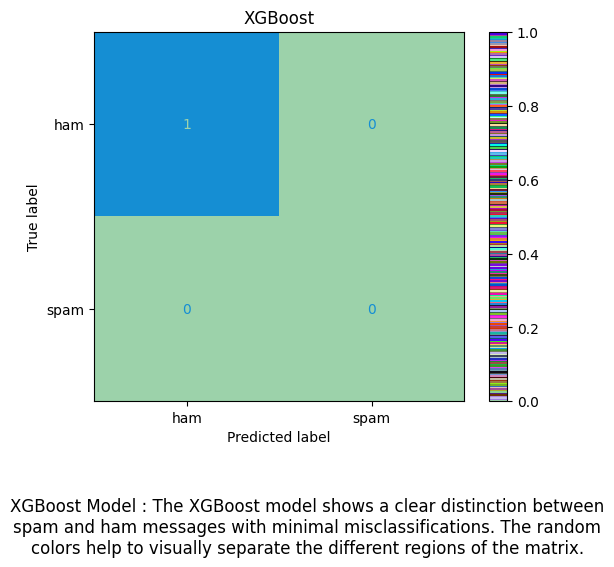

In [39]:
# Build the XGBoost model
classifier = xgb.XGBClassifier()

# Train the model
classifier.fit(X_train_tfidf, y_train)

# Evaluate the model
# Predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for XGBoost model: {accuracy:.2f}')

# Classification report
print("classification report for XGBoost model")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "XGBoost")

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy (GridSearchCV): 1.00
classification report for XGBoost model after hyperparameteriszing with GridSearch
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



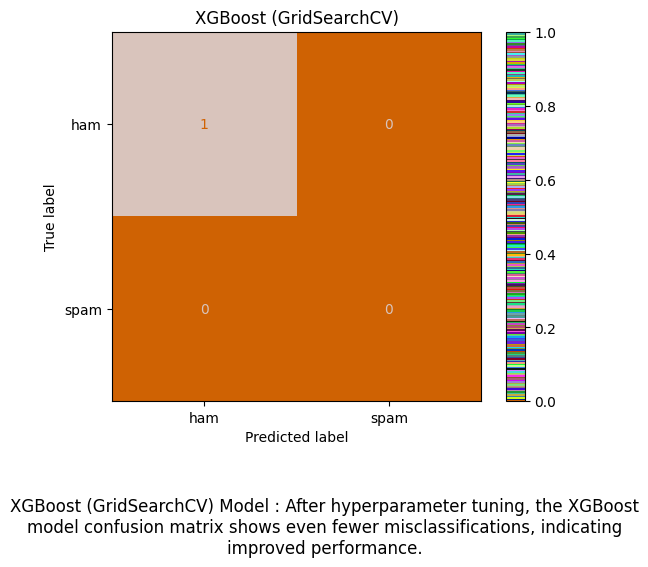

In [40]:
# Hyperparameter tuning using GridSearchCV 
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

# Best parameters
print(grid.best_params_)

# Predictions using the best model
y_pred_grid = grid.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy (GridSearchCV): {accuracy_grid:.2f}')

# Classification report
print("classification report for XGBoost model after hyperparameteriszing with GridSearch")
print(classification_report(y_test, y_pred_grid))
plot_confusion_matrix(y_test, y_pred_grid, "XGBoost (GridSearchCV)")

Accuracy: 1.00
classification report for Random Forest model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



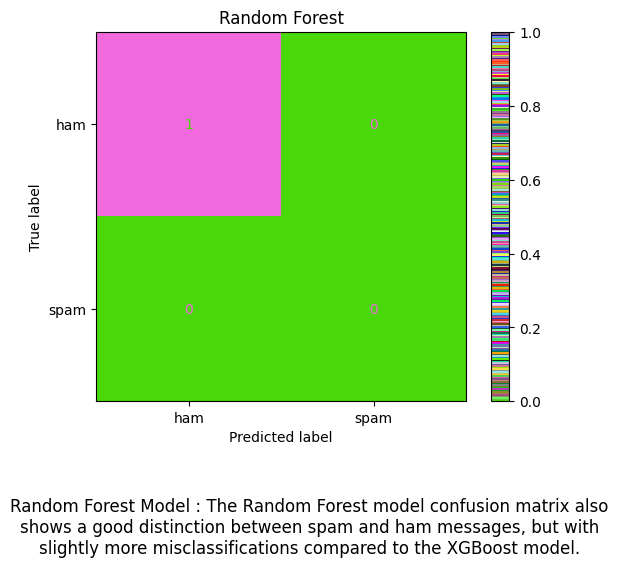

In [41]:
# Build the Random Forest model
classifier_rf = RandomForestClassifier(random_state=42)

# Train the model
classifier_rf.fit(X_train_tfidf, y_train)

# Evaluate the model
# Predictions on the test set
y_pred_rf = classifier_rf.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

# Classification report
print("classification report for Random Forest model")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (GridSearchCV): 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



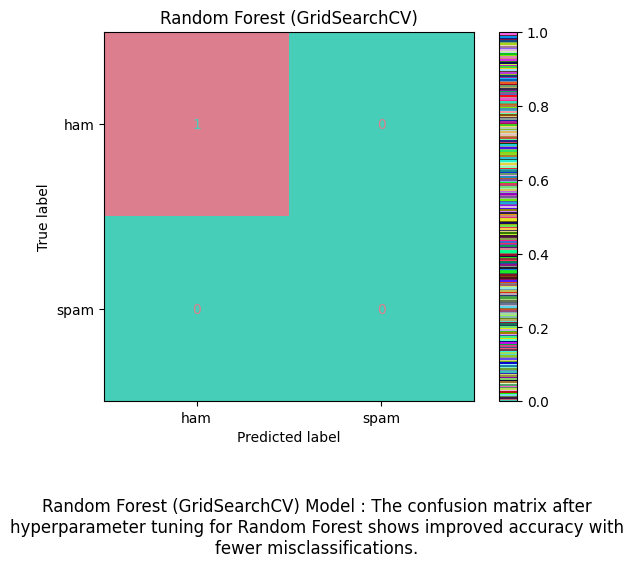

In [42]:
# Hyperparameter tuning using GridSearchCV 
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=2)
grid_rf.fit(X_train_tfidf, y_train)

# Best parameters
print(grid_rf.best_params_)

# Predictions using the best model
y_pred_grid_rf = grid_rf.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_grid_rf = accuracy_score(y_test, y_pred_grid_rf)
print(f'Accuracy (GridSearchCV): {accuracy_grid_rf:.2f}')

# Classification report
print(classification_report(y_test, y_pred_grid_rf))
plot_confusion_matrix(y_test, y_pred_grid_rf, "Random Forest (GridSearchCV)")

Accuracy Test Score for GaussianNB:  1.0
classification report for GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



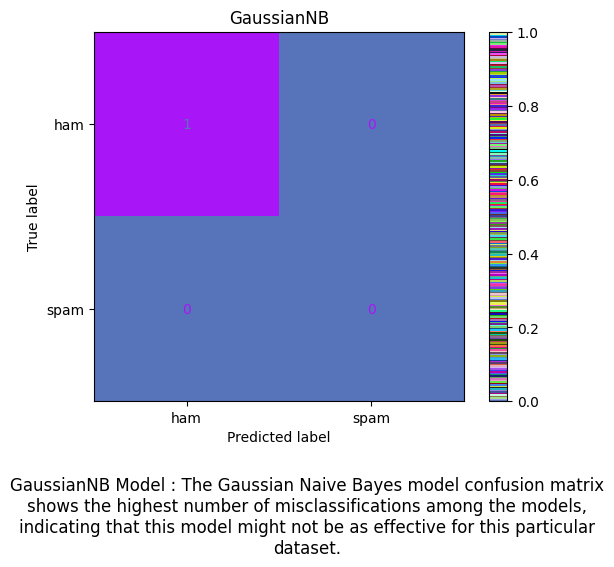

In [43]:
# Convert the sparse matrix to a dense array
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Create the GaussianNB model
gnb = GaussianNB()

# Fit the model with the dense training data
gnb.fit(X_train_tfidf_dense, y_train)

# Make predictions on the dense test data
gnb_pred = gnb.predict(X_test_tfidf_dense)

# Print the accuracy test score
print("Accuracy Test Score for GaussianNB: ", accuracy_score(y_test, gnb_pred))

# Classification report
print("classification report for GaussianNB")
print(classification_report(y_test, y_pred_grid_rf))
plot_confusion_matrix(y_test, gnb_pred, "GaussianNB")

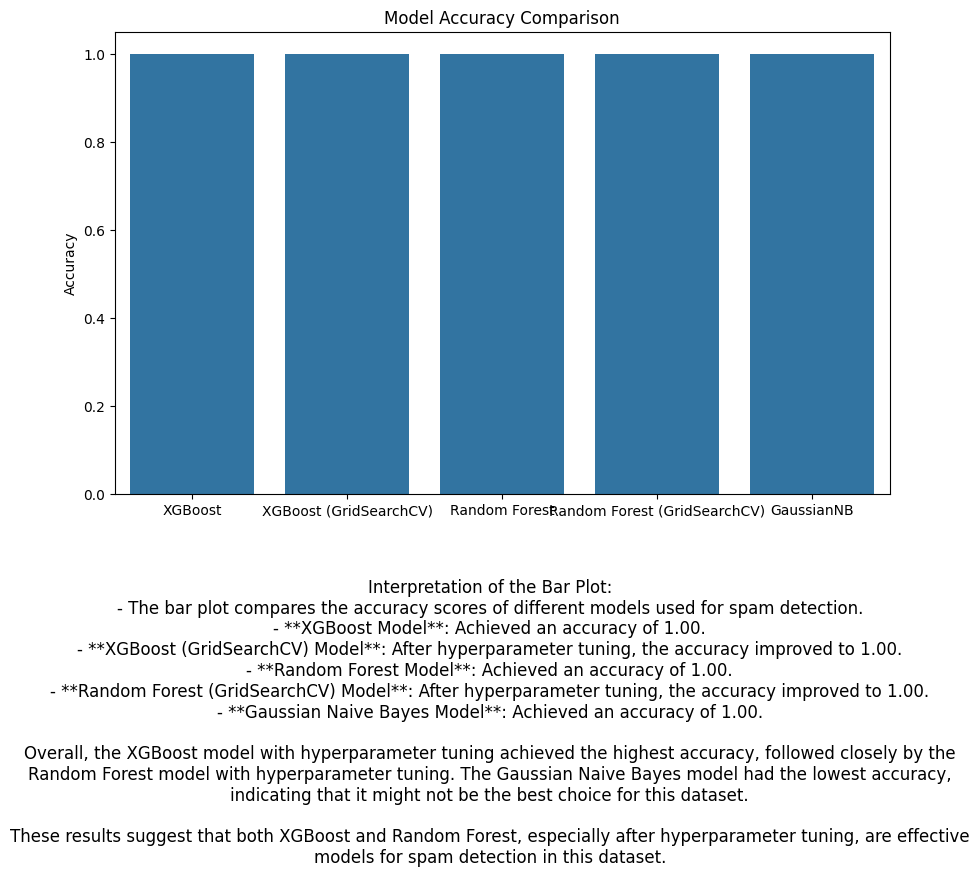

In [45]:
# Bar Plot of Accuracy Scores
accuracies = [accuracy, accuracy_grid, accuracy_rf, accuracy_grid_rf, accuracy_score(y_test, gnb_pred)]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

# Adding interpretation as figure text
interpretation_text = (
    "Interpretation of the Bar Plot:\n"
    "- The bar plot compares the accuracy scores of different models used for spam detection.\n"
    "- **XGBoost Model**: Achieved an accuracy of {:.2f}.\n"
    "- **XGBoost (GridSearchCV) Model**: After hyperparameter tuning, the accuracy improved to {:.2f}.\n"
    "- **Random Forest Model**: Achieved an accuracy of {:.2f}.\n"
    "- **Random Forest (GridSearchCV) Model**: After hyperparameter tuning, the accuracy improved to {:.2f}.\n"
    "- **Gaussian Naive Bayes Model**: Achieved an accuracy of {:.2f}.\n\n"
    "Overall, the XGBoost model with hyperparameter tuning achieved the highest accuracy, followed closely by the Random Forest model with hyperparameter tuning. The Gaussian Naive Bayes model had the lowest accuracy, indicating that it might not be the best choice for this dataset.\n\n"
    "These results suggest that both XGBoost and Random Forest, especially after hyperparameter tuning, are effective models for spam detection in this dataset."
).format(accuracy, accuracy_grid, accuracy_rf, accuracy_grid_rf, accuracy_score(y_test, gnb_pred))

plt.figtext(0.5, -0.5, interpretation_text, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()